In [7]:
import numpy as np 
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
import matplotlib.pyplot as plt
import string
import re
from collections import Counter
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from wordcloud import WordCloud
from math import ceil
from collections import OrderedDict
import copy

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIRHIKAGURUMURTHY\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIRHIKAGURUMURTHY\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
df = pd.read_csv('deceptive-opinion.csv')
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [9]:
stopword = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

In [11]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [word for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
df['Text_cleaned'] = df['text'].apply(lambda x: clean_text(x))

In [12]:
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
def listtostr(s):
    str1=" "
    return (str1.join(s))

df['Text_stemmed'] = df['Text_cleaned'].apply(lambda x: stemming(x))
df['text_cleaned_str'] = df['Text_cleaned'].apply(lambda x: listtostr(x))

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text
df['Text_lemmatized_stemmed'] = df['Text_stemmed'].apply(lambda x: lemmatizer(x))
df.head()

,deceptive,hotel,polarity,source,text,Text_cleaned,Text_stemmed,text_cleaned_str,Text_lemmatized_stemmed
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,"[stayed, one, night, getaway, family, thursday...","[stay, one, night, getaway, famili, thursday, ...",stayed one night getaway family thursday tripl...,"[stay, one, night, getaway, famili, thursday, ..."
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,"[triple, rate, upgrade, view, room, less, also...","[tripl, rate, upgrad, view, room, less, also, ...",triple rate upgrade view room less also includ...,"[tripl, rate, upgrad, view, room, le, also, in..."
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,"[comes, little, late, im, finally, catching, r...","[come, littl, late, im, final, catch, review, ...",comes little late im finally catching reviews ...,"[come, littl, late, im, final, catch, review, ..."
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,"[omni, chicago, really, delivers, fronts, spac...","[omni, chicago, realli, deliv, front, spacious...",omni chicago really delivers fronts spaciousne...,"[omni, chicago, realli, deliv, front, spacious..."
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,"[asked, high, floor, away, elevator, got, room...","[ask, high, floor, away, elev, got, room, plea...",asked high floor away elevator got room pleasa...,"[ask, high, floor, away, elev, got, room, plea..."


In [13]:
first_pronouns = [
    'i', 'me', 'we', 'us',
    'myself', 'ourselves',
    'mine', 'my', 'our', 'ours'
]


def total_length(review):
    return len(review)


def avg_word_length(review):
    return ceil(sum(len(word) for word in review) / len(review) * 100) / 100.0


def capital_letters(review):
    count = 0
    for word in review:
        if not word.islower():
            count += 1
    return ceil(float(count / len(review)) * 100) / 100.0


def capital_words(review):
    count = 0
    for word in review:
        if word.isupper():
            count = count + 1
    return ceil(float(count / len(review)) * 100) / 100.0


def count_first_pronouns(review):
    count = 0
    for word in review:
        if word.lower() in first_pronouns:
            count += 1
    return count

In [14]:
def wordcloud(text):
     wordcloud=WordCloud().generate(text)
     plt.imshow(wordcloud, interpolation='bilinear')
     plt.axis("off")

str1=""
df['text_cleaned_str']

0       stayed one night getaway family thursday tripl...
1       triple rate upgrade view room less also includ...
2       comes little late im finally catching reviews ...
3       omni chicago really delivers fronts spaciousne...
4       asked high floor away elevator got room pleasa...
                              ...                        
1595    problems started booked intercontinental chica...
1596    amalfi hotel beautiful website interior decora...
1597    intercontinental chicago magnificent mile outs...
1598    palmer house hilton looks good pictures outsid...
1599    former chicagoan im appalled amalfi hotel chic...
Name: text_cleaned_str, Length: 1600, dtype: object

(-0.5, 399.5, 199.5, -0.5)

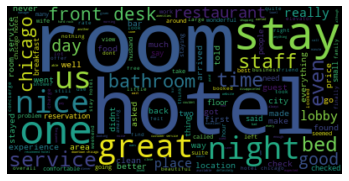

In [15]:
wordcloud2 = WordCloud().generate(' '.join(df['text_cleaned_str']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

In [16]:
df['total_length'] = df['text'].apply(lambda x: total_length(x))
df['capital_letters'] = df['text'].apply(lambda x: capital_letters(x))
df['capital_words'] = df['text'].apply(lambda x: capital_words(x))
df['first_pronouns'] = df['text'].apply(lambda x: count_first_pronouns(x))
df

,deceptive,hotel,polarity,source,text,Text_cleaned,Text_stemmed,text_cleaned_str,Text_lemmatized_stemmed,total_length,capital_letters,capital_words,first_pronouns
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,"[stayed, one, night, getaway, family, thursday...","[stay, one, night, getaway, famili, thursday, ...",stayed one night getaway family thursday tripl...,"[stay, one, night, getaway, famili, thursday, ...",572,0.26,0.03,23
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,"[triple, rate, upgrade, view, room, less, also...","[tripl, rate, upgrad, view, room, less, also, ...",triple rate upgrade view room less also includ...,"[tripl, rate, upgrad, view, room, le, also, in...",286,0.25,0.04,18
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,"[comes, little, late, im, finally, catching, r...","[come, littl, late, im, final, catch, review, ...",comes little late im finally catching reviews ...,"[come, littl, late, im, final, catch, review, ...",1104,0.25,0.03,61
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,"[omni, chicago, really, delivers, fronts, spac...","[omni, chicago, realli, deliv, front, spacious...",omni chicago really delivers fronts spaciousne...,"[omni, chicago, realli, deliv, front, spacious...",707,0.23,0.02,42
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,"[asked, high, floor, away, elevator, got, room...","[ask, high, floor, away, elev, got, room, plea...",asked high floor away elevator got room pleasa...,"[ask, high, floor, away, elev, got, room, plea...",384,0.24,0.03,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...,"[problems, started, booked, intercontinental, ...","[problem, start, book, intercontinent, chicago...",problems started booked intercontinental chica...,"[problem, start, book, intercontinent, chicago...",746,0.24,0.03,41
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...,"[amalfi, hotel, beautiful, website, interior, ...","[amalfi, hotel, beauti, websit, interior, deco...",amalfi hotel beautiful website interior decora...,"[amalfi, hotel, beauti, websit, interior, deco...",671,0.23,0.02,38
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...,"[intercontinental, chicago, magnificent, mile,...","[intercontinent, chicago, magnific, mile, outs...",intercontinental chicago magnificent mile outs...,"[intercontinent, chicago, magnific, mile, outs...",771,0.22,0.02,44
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i...","[palmer, house, hilton, looks, good, pictures,...","[palmer, hous, hilton, look, good, pictur, out...",palmer house hilton looks good pictures outsid...,"[palmer, hous, hilton, look, good, pictur, out...",449,0.26,0.03,21


In [17]:
def POS_Tagging(sentence):
    tagged_list = []
    tags = []
    count_verbs = 0
    count_nouns = 0
    text=nltk.word_tokenize(sentence)
    tagged_list = (nltk.pos_tag(text))
    
    tags = [x[1] for x in tagged_list]
    for each_item in tags:
        if each_item in ['VERB','VB','VBN','VBD','VBZ','VBG','VBP']:
            count_verbs+=1
        elif each_item in ['NOUN','NNP','NN','NUM','NNS','NP','NNPS']:
            count_nouns+=1
        else:
            continue
    return (count_verbs/count_nouns)

In [18]:
df['nouns_verbs__count'] = df['text'].apply(lambda x: POS_Tagging(x))


In [66]:
df['total_length'].mean()

806.39125

In [69]:
df['first_pronouns'].mean()

42.64

In [71]:
tr=df[df['deceptive']=="truthful"]

In [72]:
dc=df[df['deceptive']=="deceptive"]

In [73]:
tr['total_length'].mean()

821.015

In [74]:
tr['first_pronouns'].mean()

42.01875

In [75]:
dc['total_length'].mean()

791.7675

In [76]:
dc['first_pronouns'].mean()

43.26125

In [79]:
dc['first_pronouns'].max()

183

In [80]:
tr['first_pronouns'].max()

233

In [81]:
tr['total_length'].max()

4159

In [82]:
dc['total_length'].max()

4075

In [83]:
df['total_length'].max()

4159

In [19]:
from afinn import Afinn
afinn = Afinn(language='en')
df['afinn_score'] = df['text'].apply(afinn.score)
df['afinn_score'].describe()

count    1600.000000
mean       10.091250
std        12.681717
min       -41.000000
25%         1.000000
50%        10.000000
75%        18.000000
max        77.000000
Name: afinn_score, dtype: float64

In [20]:
def word_count(text_string):
    return len(text_string.split())
df['word_count'] = df['text'].apply(word_count)

In [21]:
df['afinn_adjusted'] = df['afinn_score'] / df['word_count'] * 100

In [22]:
df['afinn_adjusted_abs'] = df['afinn_adjusted'].abs()

In [23]:
Sentiment_Word_list = []
for line in open("sentiment_list.txt" ,encoding="utf-8").readlines():
    if line.strip():
        word_split = line.split()
        Sentiment_Word_list.append(word_split[0])
Sentiment_Word_list

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [24]:
def count_sentiment(text):
    count=0
   # text=text.lower()
    for word in text:
        if word in Sentiment_Word_list:
            count=count+1
    return count
        

In [25]:
df['senti_count'] = df['Text_cleaned'].apply(lambda x: count_sentiment(x))
df

,deceptive,hotel,polarity,source,text,Text_cleaned,Text_stemmed,text_cleaned_str,Text_lemmatized_stemmed,total_length,capital_letters,capital_words,first_pronouns,nouns_verbs__count,afinn_score,word_count,afinn_adjusted,afinn_adjusted_abs,senti_count
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,"[stayed, one, night, getaway, family, thursday...","[stay, one, night, getaway, famili, thursday, ...",stayed one night getaway family thursday tripl...,"[stay, one, night, getaway, famili, thursday, ...",572,0.26,0.03,23,0.387097,7.0,105,6.666667,6.666667,9
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,"[triple, rate, upgrade, view, room, less, also...","[tripl, rate, upgrad, view, room, less, also, ...",triple rate upgrade view room less also includ...,"[tripl, rate, upgrad, view, room, le, also, in...",286,0.25,0.04,18,0.333333,7.0,45,15.555556,15.555556,2
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,"[comes, little, late, im, finally, catching, r...","[come, littl, late, im, final, catch, review, ...",comes little late im finally catching reviews ...,"[come, littl, late, im, final, catch, review, ...",1104,0.25,0.03,61,0.549020,16.0,207,7.729469,7.729469,16
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,"[omni, chicago, really, delivers, fronts, spac...","[omni, chicago, realli, deliv, front, spacious...",omni chicago really delivers fronts spaciousne...,"[omni, chicago, realli, deliv, front, spacious...",707,0.23,0.02,42,0.311111,10.0,127,7.874016,7.874016,7
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,"[asked, high, floor, away, elevator, got, room...","[ask, high, floor, away, elev, got, room, plea...",asked high floor away elevator got room pleasa...,"[ask, high, floor, away, elev, got, room, plea...",384,0.24,0.03,26,1.142857,9.0,72,12.500000,12.500000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...,"[problems, started, booked, intercontinental, ...","[problem, start, book, intercontinent, chicago...",problems started booked intercontinental chica...,"[problem, start, book, intercontinent, chicago...",746,0.24,0.03,41,0.675676,-5.0,131,-3.816794,3.816794,10
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...,"[amalfi, hotel, beautiful, website, interior, ...","[amalfi, hotel, beauti, websit, interior, deco...",amalfi hotel beautiful website interior decora...,"[amalfi, hotel, beauti, websit, interior, deco...",671,0.23,0.02,38,0.961538,16.0,121,13.223140,13.223140,9
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...,"[intercontinental, chicago, magnificent, mile,...","[intercontinent, chicago, magnific, mile, outs...",intercontinental chicago magnificent mile outs...,"[intercontinent, chicago, magnific, mile, outs...",771,0.22,0.02,44,0.621622,17.0,141,12.056738,12.056738,15
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i...","[palmer, house, hilton, looks, good, pictures,...","[palmer, hous, hilton, look, good, pictur, out...",palmer house hilton looks good pictures outsid...,"[palmer, hous, hilton, look, good, pictur, out...",449,0.26,0.03,21,0.947368,-1.0,86,-1.162791,1.162791,6


In [26]:
final=df[['deceptive','senti_count','total_length','capital_letters','capital_words','first_pronouns','nouns_verbs__count','afinn_adjusted_abs']]

In [27]:
final

,deceptive,senti_count,total_length,capital_letters,capital_words,first_pronouns,nouns_verbs__count,afinn_adjusted_abs
0,truthful,9,572,0.26,0.03,23,0.387097,6.666667
1,truthful,2,286,0.25,0.04,18,0.333333,15.555556
2,truthful,16,1104,0.25,0.03,61,0.549020,7.729469
3,truthful,7,707,0.23,0.02,42,0.311111,7.874016
4,truthful,6,384,0.24,0.03,26,1.142857,12.500000
...,...,...,...,...,...,...,...,...
1595,deceptive,10,746,0.24,0.03,41,0.675676,3.816794
1596,deceptive,9,671,0.23,0.02,38,0.961538,13.223140
1597,deceptive,15,771,0.22,0.02,44,0.621622,12.056738
1598,deceptive,6,449,0.26,0.03,21,0.947368,1.162791
